In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading Data Set using Pandas
df= pd.read_csv('DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [3]:
# Finding different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [4]:
#Cheching null values
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [5]:
# Replacing char value to mode
df.Card_Category.fillna(df.Card_Category.mode()[0],inplace=True)

In [6]:
# Replacing num value to median
df.Credit_Limit.fillna(df.Credit_Limit.median(),inplace=True)

In [7]:
#Rechecking null value
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
#Categorising num value and char value
def data_type(df1):
    cat=[]
    num=[]
    for col in df1:
        if df1[col].nunique()<43:
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat_var,num_var=data_type(df)
print(tabulate({'Categorical':cat_var,'Numerical':num_var},headers=['Categorical','Numerical']))

Categorical               Numerical
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Education_Level           Dependent_count
Marital_Status            Months_on_book
Income_Category           Credit_Limit
Card_Category             Total_Revolving_Bal
Region                    Avg_Open_To_Buy
Total_Relationship_Count  Total_Trans_Amt
Months_Inactive_12_mon    Total_Trans_Ct
Contacts_Count_12_mon     Avg_Utilization_Ratio


In [9]:
# describing the num value
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8678.615444,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9168.315165,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2563.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4557.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11081.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,143.000000,56.000000,6.000000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


The dataset contains the details of 10167 customers.

The average age of the customer of this bank is around 46 years and median is also 46 years we can conlude data is normaly distributed.

The avg credit limit is 8678 where the median lies in 4557 so we can conclude it is highely left skewed curve.

The average dependent count of customers is ~3 and median is 2 and max is 143 there are outliers in this data set.

In [10]:
def num_info(col):
    print(col)
    print('*********************')
    summary=df[col].describe()
    print(summary)
    print(f'median {df[col].median()}')
    print(f'mode {df[col].mode()[0]}')
    print(f'skewness {df[col].skew()}')
    print(f'kurtos {df[col].kurt()}')
    
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    ax[0].hist(df[col])
    ax[0].set_title('Histogram')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')
    
    sns.boxplot(y=df[col],ax=ax[1])
    ax[1].set_title('Boxplot')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Count')
    
def main1(col):
    num_info(col)
    num_visual(col)
    
def outliers(col):
    summary=df[col].describe()
    iqr=(summary['75%']-summary['25%'])
    ul=summary['75%']+1.5*iqr
    ll=summary['25%']-1.5*iqr
    return ll,ul
def re_outliers(col):
    ll,ul=outliers(col)
    a=df[(df[col]>=ul)|(df[col]<=ll)].index
    for i in a:
        df.loc[i,col]=df[col].median()
    main1(col)

Customer_Age
*********************
count    10127.000000
mean        46.382245
std          8.341393
min         18.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         89.000000
Name: Customer_Age, dtype: float64
median 46.0
mode 44
skewness 0.1291566318882164
kurtos 0.5261855468251819


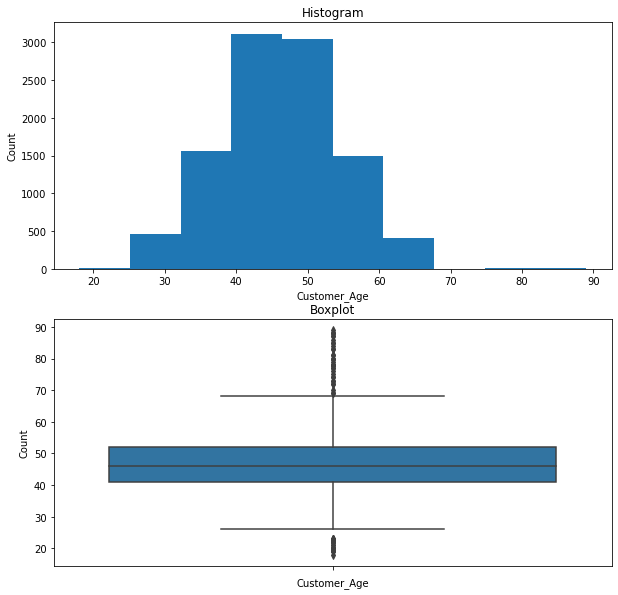

In [11]:
main1(num_var[1])

Dependent_count
*********************
count    10127.000000
mean         2.787400
std          6.479135
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        143.000000
Name: Dependent_count, dtype: float64
median 2.0
mode 3
skewness 14.932511334305024
kurtos 243.99719517839253


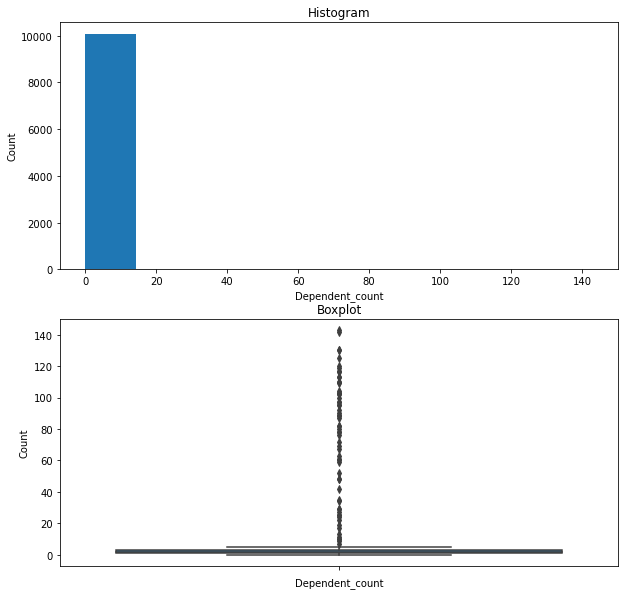

In [12]:
main1(num_var[2])

Dependent_count
*********************
count    10127.000000
mean         2.345216
std          1.295746
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64
median 2.0
mode 3
skewness -0.015609756551188148
kurtos -0.6697024802671834


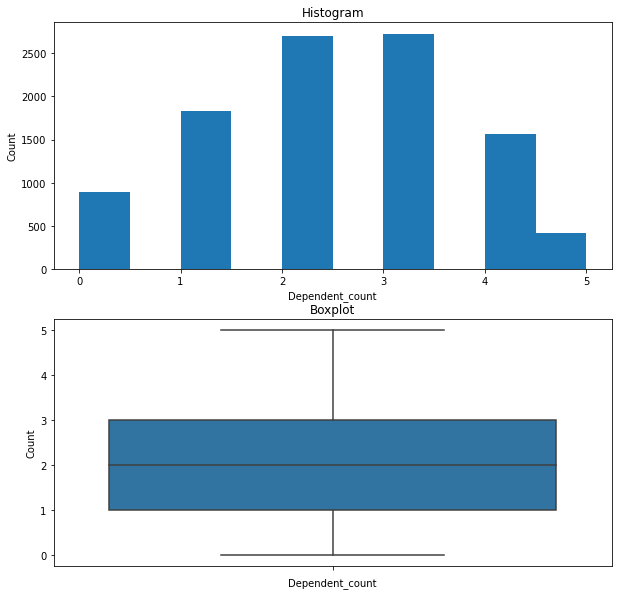

In [13]:
re_outliers(num_var[2])

Months_on_book
*********************
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64
median 36.0
mode 36
skewness -0.10656535989402989
kurtos 0.40010012019986707


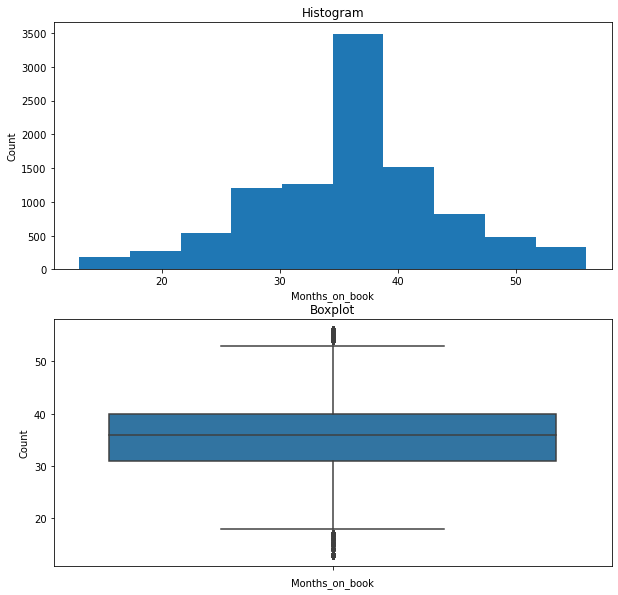

In [14]:
main1(num_var[3])

Months_on_book
*********************
count    10127.000000
mean        35.946677
std          6.934324
min         18.000000
25%         32.000000
50%         36.000000
75%         40.000000
max         53.000000
Name: Months_on_book, dtype: float64
median 36.0
mode 36
skewness -0.057806787981882976
kurtos 0.11716857709347428


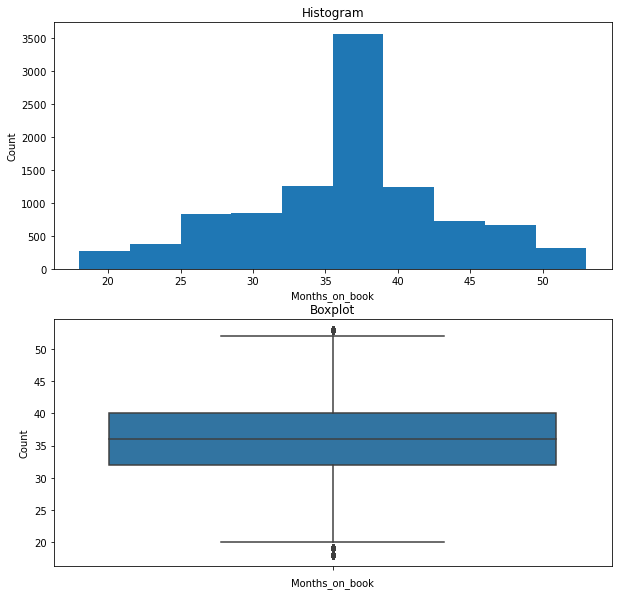

In [15]:
re_outliers(num_var[3])

Credit_Limit
*********************
count    10127.000000
mean      8678.615444
std       9168.315165
min       1438.300000
25%       2563.000000
50%       4557.000000
75%      11081.500000
max      34664.000000
Name: Credit_Limit, dtype: float64
median 4557.0
mode 34516.0
skewness 1.6642465975524867
kurtos 1.7711091211748649


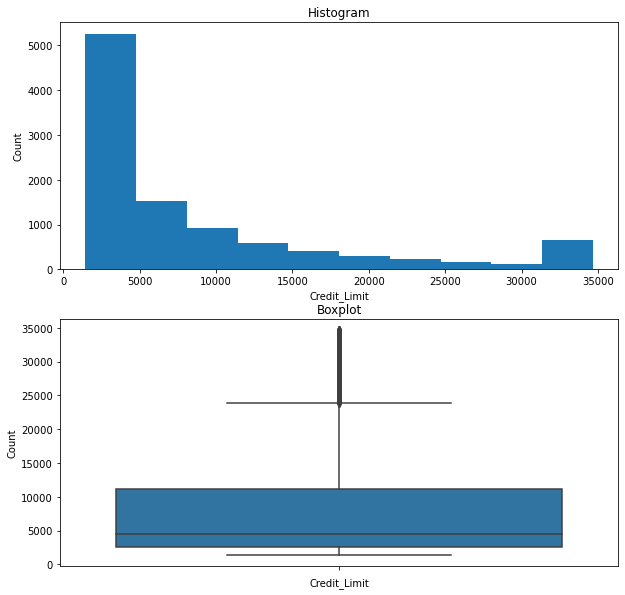

In [16]:
main1(num_var[4])

Credit_Limit
*********************
count    10127.000000
mean      7889.745927
std       7215.353395
min       1438.300000
25%       2563.000000
50%       4557.000000
75%      11081.500000
max      23720.800000
Name: Credit_Limit, dtype: float64
median 4557.0
mode 23720.799999999996
skewness 1.1921404360318444
kurtos 0.06112902516103569


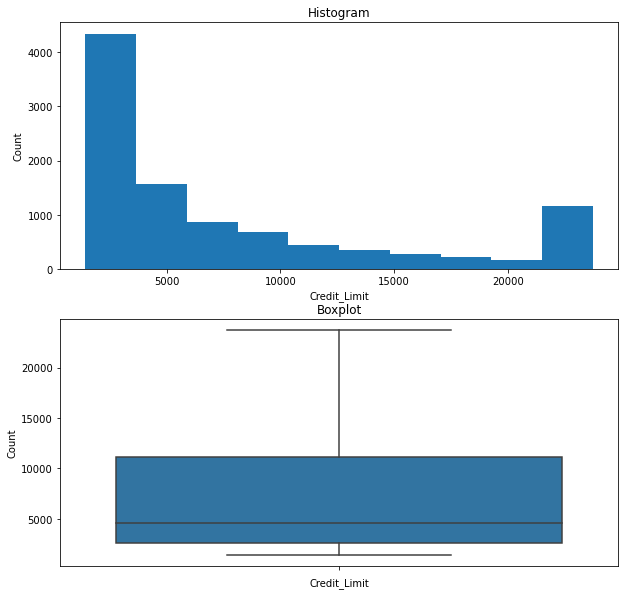

In [17]:
#Trateing the outliers to the 90th quartile value
clq = df['Credit_Limit'].quantile(0.90)
df.loc[df['Credit_Limit'] > clq, 'Credit_Limit'] = clq
main1(num_var[4])

Avg_Open_To_Buy
*********************
count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64
median 3474.0
mode 1438.3
skewness 1.6616965459311595
kurtos 1.7986172957122664


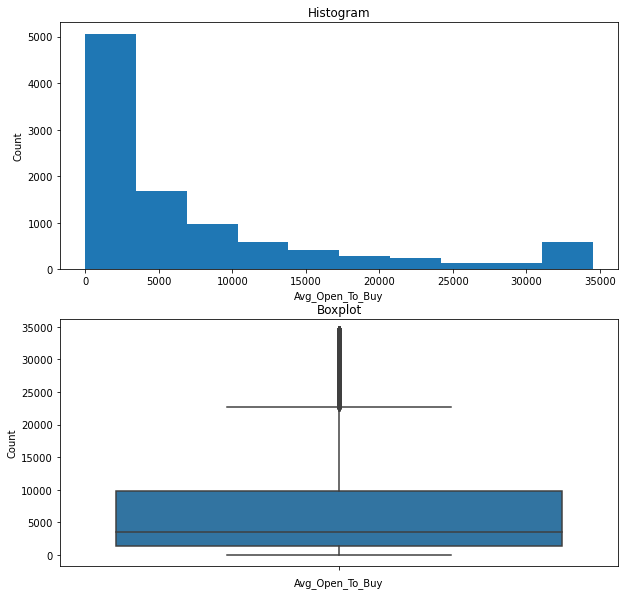

In [18]:
main1(num_var[6])

Avg_Open_To_Buy
*********************
count    10127.000000
mean      6652.674524
std       7074.925563
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      21964.600000
Name: Avg_Open_To_Buy, dtype: float64
median 3474.0
mode 21964.6
skewness 1.1558899853148947
kurtos -0.0346375039941309


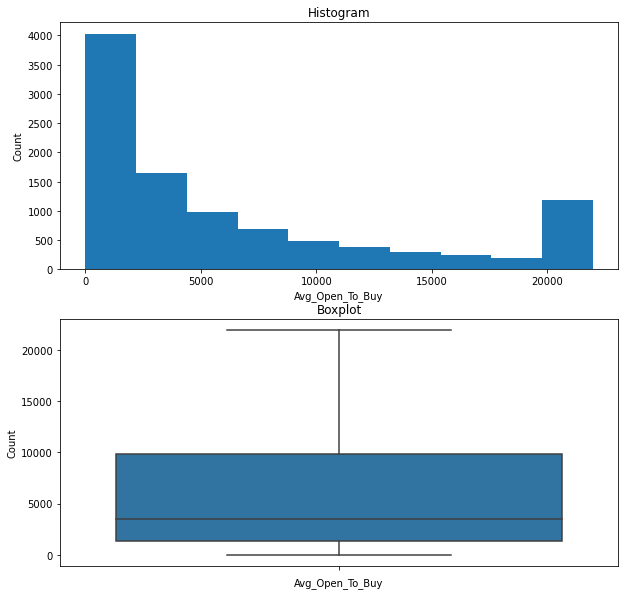

In [19]:
clq = df['Avg_Open_To_Buy'].quantile(0.90)
df.loc[df['Avg_Open_To_Buy'] > clq, 'Avg_Open_To_Buy'] = clq
main1(num_var[6])

Total_Trans_Amt
*********************
count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64
median 3899.0
mode 4253
skewness 2.0410034025756936
kurtos 3.8940234056985163


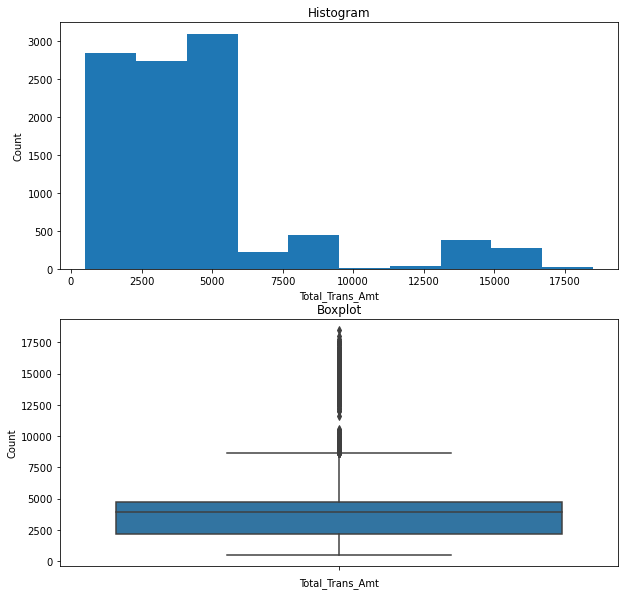

In [20]:
main1(num_var[7])

Total_Trans_Amt
*********************
count    10127.000000
mean      3910.163740
std       2081.283454
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max       8212.400000
Name: Total_Trans_Amt, dtype: float64
median 3899.0
mode 8212.4
skewness 0.7398606453940872
kurtos -0.20991310180998957


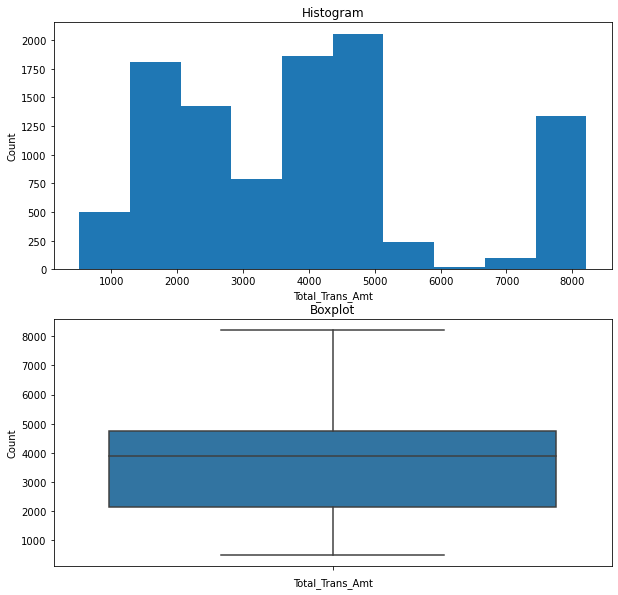

In [21]:
clq = df['Total_Trans_Amt'].quantile(0.90)
df.loc[df['Total_Trans_Amt'] > clq, 'Total_Trans_Amt'] = clq
main1(num_var[7])

Total_Trans_Ct
*********************
count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64
median 67.0
mode 81
skewness 0.15367306849872275
kurtos -0.36716324112759624


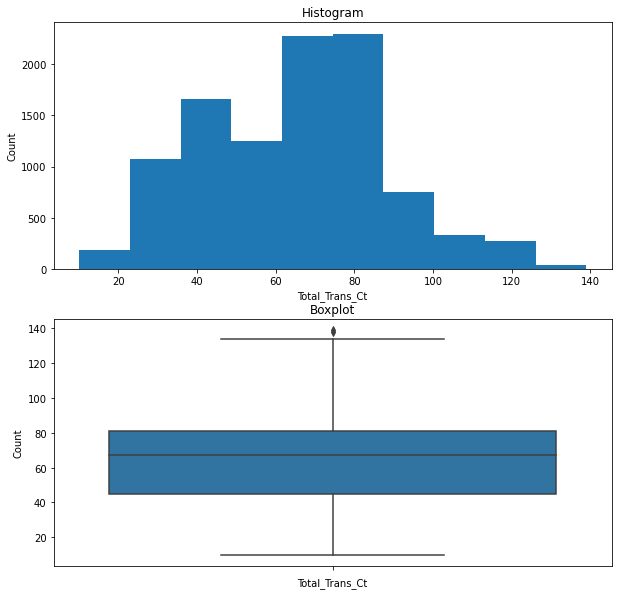

In [22]:
main1(num_var[8])

Total_Trans_Ct
*********************
count    10127.000000
mean        64.844574
std         23.449757
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        134.000000
Name: Total_Trans_Ct, dtype: float64
median 67.0
mode 81
skewness 0.14980992423396222
kurtos -0.3757670384680445


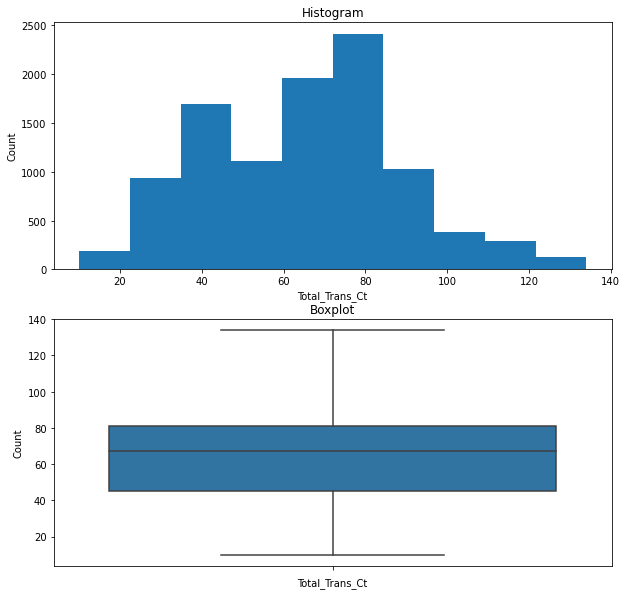

In [23]:
re_outliers(num_var[8])

In [24]:
# df.to_csv('C:\\Users\\gskau\\OneDrive\\Desktop\\NIIT\\Project\\Tableau\\Clean_Bank_Churn_Data.csv')